In [1]:
# https://janakiev.com/blog/jupyter-virtual-envs/ to enable virtual_env within jupyter
!cd /home/shashank3110/YoGan/

In [2]:
import sys
sys.path.append('/home/shashank3110/YoGan/')
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import datetime,pickle
from random import shuffle
from PIL import Image
from skimage.io import imsave
from yoga_text_to_class_predict import load_text_model
from yogan.library.utility.ssim import ssim_score
from keras.preprocessing.image import img_to_array, load_img
from yogan.library.dcgan import DCGan

[nltk_data] Downloading package punkt to
[nltk_data]     /home/shashank3110/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shashank3110/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using TensorFlow backend.


In [3]:
YOGA_CLASS=['agnistambhasana', 'ananda balasana', 'ardha pincha mayurasana',
       'ardha uttanasana', 'astavakrasana', 'bhekasana', 'bhujapidasana',
       'bitilasana', 'camatkarasana', 'chaturanga dandasana',
       'ganda bherundasana', 'garudasana', 'halasana', 'malasana',
       'marichyasana iii', 'marjaryasana', 'matsyasana',
       'parivrtta janu sirsasana', 'parivrtta trikonasana', 'parsva bakasana',
       'parsvottanasana', 'pasasana', 'salamba bhujangasana',
       'salamba sarvangasana', 'savasana', 'sukhasana',
       'supta baddha konasana', 'tolasana', 'urdhva mukha svanasana',
       'ustrasana', 'uttana shishosana', 'utthita parsvakonasana', 'vajrasana',
       'virabhadrasana iii']

gan_list=['14012020_2131_45','epoch-4950-03012020_1216_55','15012020_2205_37','16012020_1756_32','16012020_2257_39'] #replace with final 5 class models
img_width = 64
img_height = 64
model_dir_path = '/dev/shm/shashank3110'+ '/final_models'
ground_truth_img_dir = '/home/shashank3110/keras-text-to-image/demo/data/yoga/img/'
class_list=['pasasana','agnistambhasana','bhujapidasana','bitilasana','matsyasana']
model_dict = dict(zip(class_list,gan_list))
dt_string = datetime.datetime.now().strftime("%d%m%Y_%H%M_%S")
pickle_path="/home/shashank3110/keras-text-to-image/demo/models/cv_pickle.pk"

In [4]:
with open(pickle_path,"rb") as f:
    cv=pickle.load(f)

In [5]:
texts = ["I am Dhiren."]
gan = DCGan()
for text in texts:
    ssim_scores=[]
    class_predicted = load_text_model(text,pickle_path,YOGA_CLASS)
    print(f"Model chosen is {class_predicted,model_dict[class_predicted]}")
    gan.load_model(model_dir_path,model_dict[class_predicted])
    img_path = ground_truth_img_dir  +  class_predicted + '.png'

    true_img = img_to_array(load_img(img_path, target_size=(img_width, img_height)))
    true_img = (true_img.astype(np.float32) / 255) * 2 - 1
    for model_name in gan_list:
        gan.load_model(model_dir_path,model_name)
        generated_image = gan.generate_image_from_text(text)
        ssim_scores.append([generated_image,ssim_score(true_img,generated_image)])
    predicted_image,score=max(ssim_scores, key = lambda x: x[1])
    print(score)


Model chosen is ('agnistambhasana', 'epoch-4950-03012020_1216_55')
/dev/shm/shashank3110/final_models/dc-gan-config.npy
16 16
3
/dev/shm/shashank3110/final_models/dc-gan-config.npy
16 16
3
1/1 [==============================] - 0s 257ms/step
/dev/shm/shashank3110/final_models/dc-gan-config.npy
16 16


/home/shashank3110/YoGan/yogan/library/utility/ssim.py:7: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  ssim_score=ssim(img1,img2,multi_channel=True,win_size=3)


3
1/1 [==============================] - 0s 208ms/step
/dev/shm/shashank3110/final_models/dc-gan-config.npy
16 16
3
1/1 [==============================] - 0s 254ms/step
/dev/shm/shashank3110/final_models/dc-gan-config.npy
16 16
3
1/1 [==============================] - 0s 215ms/step
/dev/shm/shashank3110/final_models/dc-gan-config.npy
16 16
3
1/1 [==============================] - 0s 254ms/step
-0.03700428246064686


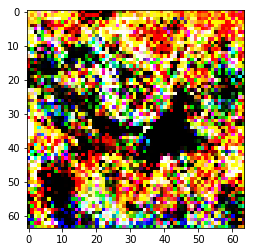

In [6]:
#view best image predicted based on ssim score
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(predicted_image)

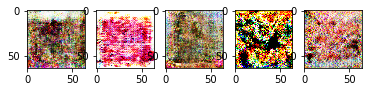

In [7]:
# view all images generated by the models
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
f, axarr = plt.subplots(1,5)
k=0
for img,score in ssim_scores:
    axarr[k].imshow(img)
    k+=1